In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs()
X.shape, y.shape

((100, 2), (100,))

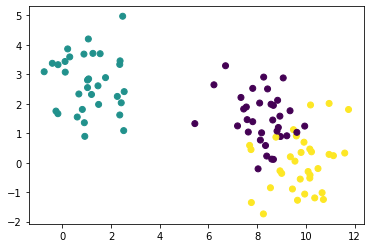

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
# 1. centroids initialization

def _cal_min_distances(X, centers):
    distances = np.sum(np.square(X[:, np.newaxis, :] - centers), axis=2)
    min_distances = np.min(distances, axis=1)
    return min_distances

def _Lloyd_centroids_init(X, k):
    N = X.shape[0]
    idx = np.random.choice(N, size=k, replace=False)
    return X[idx]

def _kmeans_plus_plus(X, k):
    N = X.shape[0]
    
    first_center = X[np.random.choice(N)]
    centers = [first_center]
    
    for i in range(k-1):
        distances_min = _cal_min_distances(X, np.array(centers))
        pdf = distances_min/np.sum(distances_min)
        
        # with pdf like this,
        # the already chosen instances will be excluded, and
        # the instances far away from centers will have higher probablities to be chosen
        new_center_idx = np.random.choice(N, p=pdf)
        new_center = X[new_center_idx]
        centers.append(new_center)
        
    return centers

def centroids_init(X, k, method):
    # defalut method 'kmeans++'
    if method == 'random':
        return _Lloyd_centroids_init(X, k)
    return _kmeans_plus_plus(X, k)

In [5]:
# 2. utils functions
def _find_first_nearest_centroid(X, centroids):
    distances = np.sum(np.square(X[:, np.newaxis, :] - centroids), axis=2)
    first_nearest_centroid_idx = np.argmin(distances, axis=1)
    return first_nearest_centroid_idx

def _ndarray(arrs):
    return np.array(arrs, dtype=object)

# 3. kmeans
def kmeans(X, k, method, max_iter=100):
    centroids = centroids_init(X, k, method)
    iterate_left = max_iter
    while iterate_left > 0:
        centroid_idx = _find_first_nearest_centroid(X, centroids)
        
        clusters = [X[centroid_idx==i] for i in range(k)]
        new_centroids = [np.mean(clusters[i], axis=0) for i in range(k)]
        
        if np.allclose(centroids, new_centroids):
            print('converage at step', max_iter-iterate_left)
            return _ndarray(clusters), _ndarray(new_centroids), centroid_idx
        else:
            centroids = new_centroids
            iterate_left -= 1
    return _ndarray(clusters), _ndarray(new_centroids), centroid_idx

In [6]:
clusters_plus_plus, centroids_plus_plus, labels_plus_plus = kmeans(X, 3, 'kmeans++', 100)

converage at step 6


In [7]:
clusters_plus_plus2, centroids_plus_plus2, labels_plus_plus2 = kmeans(X, 3, 'kmeans++', 100)

converage at step 4


In [8]:
clusters_plus_forgy, centroids_forgy, labels_forgy = kmeans(X, 3, 'random', 100)

converage at step 5


In [9]:
def plot_scatter(ax, X, labels, title):
    ax.scatter(X[:, 0], X[:, 1], c=labels)
    ax.set_title(title)

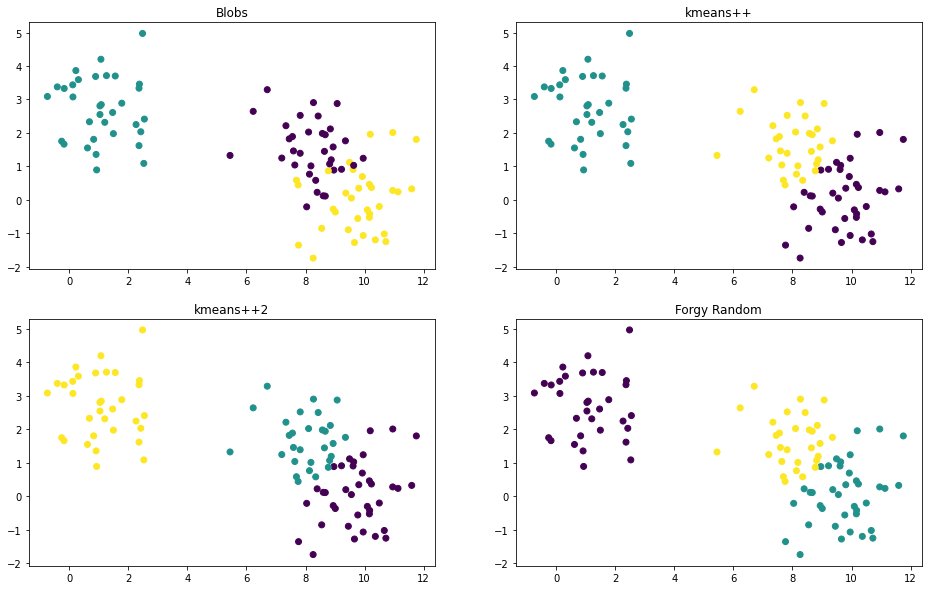

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plot_scatter(axes[0, 0], X, y, 'Blobs')
plot_scatter(axes[0, 1], X, labels_plus_plus, 'kmeans++')
plot_scatter(axes[1, 0], X, labels_plus_plus2, 'kmeans++2')
plot_scatter(axes[1, 1], X, labels_forgy, 'Forgy Random')